Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/01_Collaborative_Filtering'
except ImportError as e:
    pass

Mounted at /content/drive/
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/01_Collaborative_Filtering'
/content


# **Exercise 1: Recommender Systems - Collaborative Filtering**

Collaborative filtering is a technique used in recommendation systems to predict a user's preference for a particular item based on the preferences of other similar users.

The idea behind collaborative filtering is that if two users have similar preferences for a set of items, they are likely to have similar preferences for other items as well. Similarly, if two items have been rated highly by the same set of users, they are likely to be similar in some way and may be recommended to users who have shown an interest in one of the items.

Collaborative filtering algorithms can be based on either user-based or item-based methods. User-based collaborative filtering recommends items to a user based on the preferences of other users who are similar to them, while item-based collaborative filtering recommends items that are similar to the items a user has previously liked or rated highly.
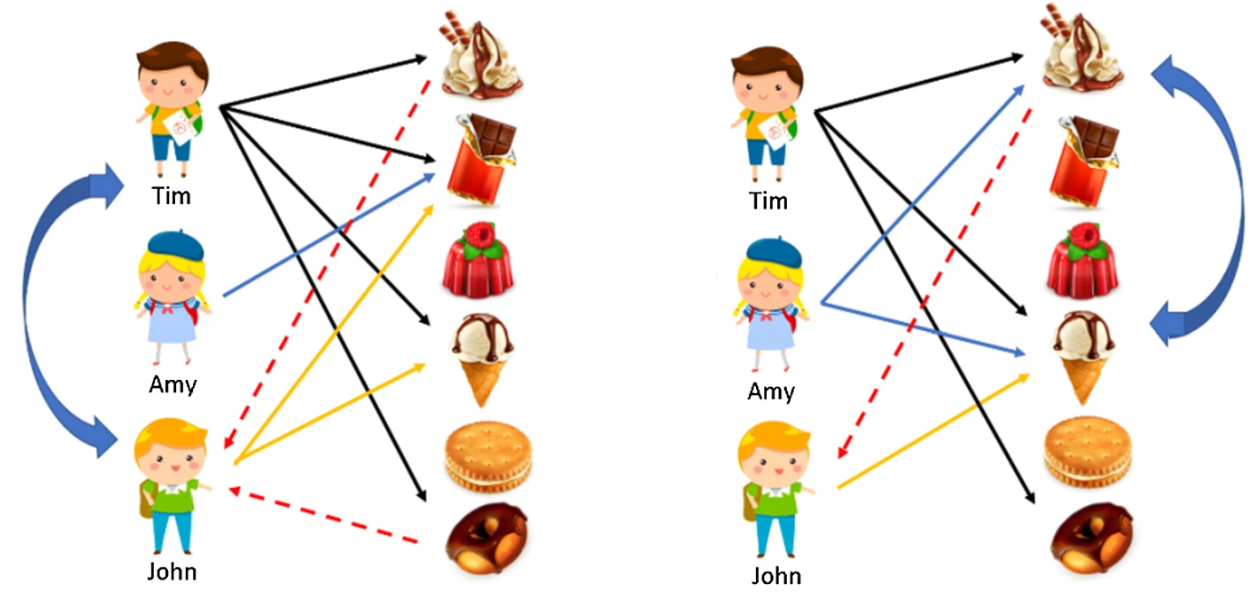
[Source: A collaborative filtering recommendation system with dynamic time decay](https://doi.org/10.1007/s11227-020-03266-2)

# **The surprise library**

[Surprise](https://surpriselib.com/) is a Python [scikit](https://projects.scipy.org/scikits.html) for building and analyzing recommender systems that deal with explicit rating data.

The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.

Nous avons commencé par installer labibliothèque Surprise  pour la construction et l'analyse de systèmes de recommandation.

In [2]:
pip install scikit-surprise==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.0.1-cp310-cp310-linux_x86_64.whl size=2023660 sha256=eb2b2a18964c0532da310ab5936cd22dd09e9220347eac48e37ffa37c6d1edb7
  Stored in directory: /root/.cache/pip/wheels/39/71/ea/bf5cb483704eeae296813c4c757f35a0caadc7e75bca787d70
Successfully built scikit-surprise


In [ ]:
!pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable


**MovieLens**

The dataset [**MovieLens-100k**](https://grouplens.org/datasets/movielens/) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service.
It contains:
- 100,836 ratings
- 3,683 tag applications
- 9,742 movies
- 610 users

These data were created between March 29, 1996 and September 24, 2018.

In [7]:
from surprise import Dataset

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')
for i in range(5):
    print(data.raw_ratings[i])

('196', '242', 3.0, '881250949')
('186', '302', 3.0, '891717742')
('22', '377', 1.0, '878887116')
('244', '51', 2.0, '880606923')
('166', '346', 1.0, '886397596')


In [22]:
# Retrieve the trainset.
trainset = data.build_full_trainset()
print("nombre des users ",trainset.n_users)
print("nombre des élements 'filmes' ",trainset.n_items)
print("nombre d'evaluations",trainset.n_ratings)

nombre des users  943
nombre des élements 'filmes'  1682
nombre d'evaluations 100000


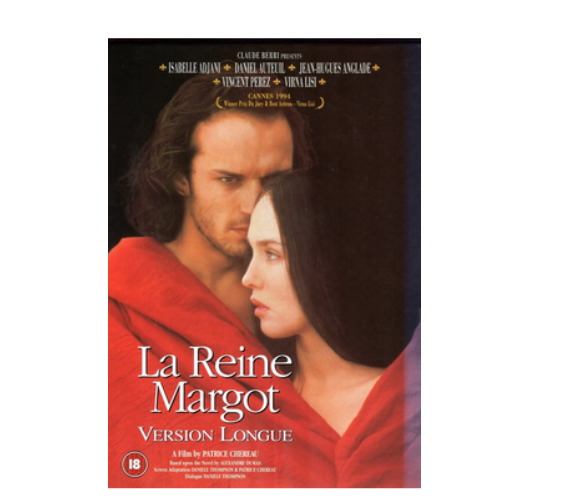

We are interested in the rating of user 196 for the movie "Queen Margot" with the id 302

In [15]:
user_id = str(196)  # raw user id (as in the ratings file). They are **strings**!
print(user_id)
item_id = str(302)  # raw item(movie) id (as in the ratings file). They are **strings**!
print(item_id)

196
302


**[Similarity measure configuration](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration)**

Many algorithms use a similarity measure to estimate a rating. The way they can be configured is done in a similar fashion as for baseline ratings: you just need to pass a `sim_options` argument at the creation of an algorithm. This argument is a dictionary with the following (all optional) keys:

 `name`: The name of the similarity to use, as defined in the similarities module. Options from the lecture: `pearson` and `cosine`. Default is `MSD`.

 `user_based`: Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.

  `min_support`: The minimum number of common items (when `user_based` is `True`) or minimum number of common users (when `user_based` is `False`) for the similarity not to be zero.

In [18]:
# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': True, 'min_support': 1}

**[KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic)** is a basic collaborative filtering algorithm for the simple prediction.

The prediction is set as:

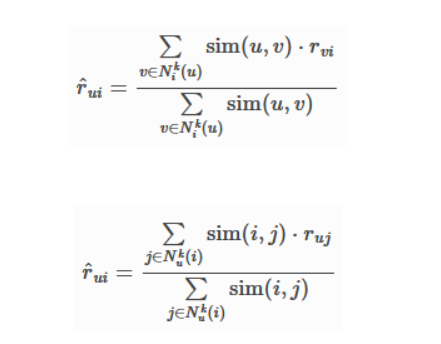



depending on the `user_based` field of the `sim_options` parameter.

In [28]:
from surprise import KNNBasic

# Création de l'algorithme KNNBasic avec les options de similarité et le nombre de voisins (k) spécifiés
algo = KNNBasic(sim_options=sim_options, k=35)

# Entraînement de l'algorithme sur l'ensemble de données d'entraînement
algo.train(trainset)

# Obtention d'une prédiction pour des utilisateurs et des items spécifiques
pred = algo.predict(user_id, item_id, r_ui=4, verbose=True)


Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.00   {'actual_k': 35, 'was_impossible': False}


[KNNWithMeans](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic) is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

The prediction is set as:
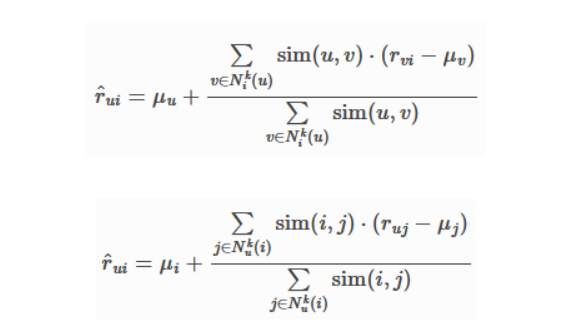



depending on the `user_based` field of the `sim_options` parameter.

La similarité de Pearson (ou corrélation de Pearson) mesure la corrélation linéaire entre deux vecteurs.

In [38]:
from surprise import KNNWithMeans
# User-based with Pearson correlation similarity and adjusted prediction considering the rating behaviour

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': True, 'min_support': 1}
algo = KNNWithMeans(sim_options=sim_options)
algo.train(trainset)

# get a prediction for specific users and items.
pred = algo.predict(user_id, item_id, r_ui=4, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.03   {'actual_k': 40, 'was_impossible': False}


La similarité cosinus, quant à elle, mesure la similarité entre deux vecteurs en se basant sur l'angle entre eux dans l'espace vectoriel.

In [44]:
# Item-based with Cosine similarity and simple prediction

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'cosine', 'user_based': False, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.train(trainset)

# get a prediction for specific users and items.
pred = algo.predict(user_id, item_id, r_ui=4, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 3.61   {'actual_k': 39, 'was_impossible': False}


In [47]:
# Item-based with Pearson (Adjusted Cosine) similarity and simple prediction

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': False, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.train(trainset)

# get a prediction for specific users and items.
pred = algo.predict(user_id, item_id, r_ui=4, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 3.24   {'actual_k': 30, 'was_impossible': False}
